# Cleaning the NHANES diabetes data

[DSLC stages]: Data cleaning and pre-processing


Start by loading in any libraries that you will use in this document.


In [104]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

import sys
file_path = r"C:\Users\15184\OneDrive\Documents\Statistical Principals for Data Science\diabetesAnalysis"
sys.path.append(file_path)

pd.set_option('display.max_columns', None)


## Domain problem formulation

Write a summary of the problem.





## Data source overview

Briefly describe where the data being used for this project came from


## Step 1: Review background information {#sec-bg-info}

### Information on data collection

Write a summary of how the data was collected.

### Data dictionary

If there is a data dictionary, give some details here.


### Answering questions about the background information

Answer the recommended background information questions from the Data Cleaning chapter.

- *What does each variable measure?* 

- *How was the data collected?* 

- *What are the observational units?* 

- *Is the data relevant to my project?*




## Step 2: Loading in the data


Load in the data. 


In [96]:

diabetes_orig = pd.read_csv(file_path + "\data\samadult.csv")


<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\15184\AppData\Local\Temp\ipykernel_40584\2033878612.py:1: SyntaxWarning: invalid escape sequence '\d'
  diabetes_orig = pd.read_csv(file_path + "\data\samadult.csv")


Let's look at the first few rows to make sure it looks like it has been loaded in correctly:

In [97]:
diabetes_orig.head()

,FPX,FMX,HHX,INTV_QRT,WTIA_SA,WTFA_SA,SEX,HISPAN_I,R_MARITL,MRACRPI2,RACERPI2,MRACBPI2,AGE_P,RECTYPE,SRVY_YR,INTV_MON,REGION,PSTRAT,PPSU,PROX1,PROX2,LATEINTA,PROXYSA,PAR_STAT,FDRN_FLG,DOINGLWA,WHYNOWKA,EVERWRK,SUPERVIS,WRKCATA,BUSINC1A,LOCALL1B,WRKLONGH,HOURPDA,PDSICKA,ONEJOB,WRKLYR4,INDSTRN1,INDSTRN2,OCCUPN1,OCCUPN2,YRSWRKPA,DIFAGE2,HYPEV,HYPDIFV,HYPMDEV2,HYPMED2,CHLEV,CHLYR,CHLMDEV2,CHLMDNW2,CHDEV,ANGEV,MIEV,HRTEV,STREV,EPHEV,COPDEV,ASPMEDEV,ASPMEDAD,ASPMDMED,ASPONOWN,AASMEV,AASSTILL,AASMYR,AASERYR1,ULCEV,ULCYR,ULCCOLEV,CANEV,CNKIND1,CNKIND2,CNKIND3,CNKIND4,CNKIND5,CNKIND6,CNKIND7,CNKIND8,CNKIND9,CNKIND10,CNKIND11,CNKIND12,CNKIND13,CNKIND14,CNKIND15,CNKIND16,CNKIND17,CNKIND18,CNKIND19,CNKIND20,CNKIND21,CNKIND22,CNKIND23,CNKIND24,CNKIND25,CNKIND26,CNKIND27,CNKIND28,CNKIND29,CNKIND30,CNKIND31,PREGEVER,DBHVPAY,DBHVCLY,DBHVWLY,DBHVPAN,DBHVCLN,DBHVWLN,DIBREL,DIBEV1,DIBPRE2,DIBTEST,DIBTYPE,DIBPILL1,INSLN1,DIBINS2,DIBINS3,DIBINS4,DIBGDM,DIBBABY,DIBPRGM,DIBREFER,DIBBEGIN,AHAYFYR,SINYR,CBRCHYR,KIDWKYR,LIVYR,JNTSYMP,JMTHP1,JMTHP2,JMTHP3,JMTHP4,JMTHP5,JMTHP6,JMTHP7,JMTHP8,JMTHP9,JMTHP10,JMTHP11,JMTHP12,JMTHP13,JMTHP14,JMTHP15,JMTHP16,JMTHP17,JNTCHR,JNTHP,ARTH1,ARTHLMT,PAINECK,PAINLB,PAINLEG,PAINFACE,AMIGR,ACOLD2W,AINTIL2W,PREGNOW,PREGFLYR,HRAIDNOW,HRAIDEV,AHEARST1,AVISION,ABLIND,VIM_DREV,VIMLS_DR,VIM_CAEV,VIMLS_CA,VIMCSURG,VIM_GLEV,VIMLS_GL,VIM_MDEV,VIMLS_MD,VIMGLASS,VIMREAD,VIMDRIVE,AVISREH,AVISDEV,AVDF_NWS,AVDF_CLS,AVDF_NIT,AVDF_DRV,AVDF_PER,AVDF_CRD,AVISEXAM,AVISACT,AVISPROT,LUPPRT,CHPAIN6M,PAINLMT,HYPYR1,CANAGE1,CANAGE2,CANAGE3,CANAGE4,CANAGE5,CANAGE6,CANAGE7,CANAGE8,CANAGE9,CANAGE10,CANAGE11,CANAGE12,CANAGE13,CANAGE14,CANAGE15,CANAGE16,CANAGE17,CANAGE18,CANAGE19,CANAGE20,CANAGE21,CANAGE22,CANAGE23,CANAGE24,CANAGE25,CANAGE26,CANAGE27,CANAGE28,CANAGE29,CANAGE30,DIBAGE1,ACHRC14A,ADURA14A,ADURB14A,AFLHC19_,AFLHC20_,AFLHC21_,AFLHC22_,AFLHC23_,AFLHC24_,AFLHC25_,AFLHC26_,AFLHC27_,AFLHC28_,AFLHC29_,AFLHC30_,AFLHC31_,AFLHC32_,AFLHC33_,AFLHC34_,AFLHCA1,AFLHCA10,AFLHCA11,AFLHCA12,AFLHCA13,AFLHCA15,AFLHCA16,AFLHCA17,AFLHCA18,AFLHCA2,AFLHCA3,AFLHCA4,AFLHCA5,AFLHCA6,AFLHCA7,AFLHCA8,AFLHCA9,AFLHCA90,AFLHCA91,AHSTATYR,ALCHRC1,ALCHRC10,ALCHRC11,ALCHRC12,ALCHRC13,ALCHRC15,ALCHRC16,ALCHRC17,ALCHRC18,ALCHRC19,ALCHRC2,ALCHRC20,ALCHRC21,ALCHRC22,ALCHRC23,ALCHRC24,ALCHRC25,ALCHRC26,ALCHRC27,ALCHRC28,ALCHRC29,ALCHRC3,ALCHRC30,ALCHRC31,ALCHRC32,ALCHRC33,ALCHRC34,ALCHRC4,ALCHRC5,ALCHRC6,ALCHRC7,ALCHRC8,ALCHRC9,ALCHRC90,ALCHRC91,ALCHRONR,ALCNDRT,ALDURA1,ALDURA10,ALDURA11,ALDURA12,ALDURA13,ALDURA15,ALDURA16,ALDURA17,ALDURA18,ALDURA19,ALDURA2,ALDURA20,ALDURA21,ALDURA22,ALDURA23,ALDURA24,ALDURA25,ALDURA26,ALDURA27,ALDURA28,ALDURA29,ALDURA3,ALDURA30,ALDURA31,ALDURA32,ALDURA33,ALDURA34,ALDURA4,ALDURA5,ALDURA6,ALDURA7,ALDURA8,ALDURA9,ALDURA90,ALDURA91,ALDURB1,ALDURB10,ALDURB11,ALDURB12,ALDURB13,ALDURB15,ALDURB16,ALDURB17,ALDURB18,ALDURB19,ALDURB2,ALDURB20,ALDURB21,ALDURB22,ALDURB23,ALDURB24,ALDURB25,ALDURB26,ALDURB27,ALDURB28,ALDURB29,ALDURB3,ALDURB30,ALDURB31,ALDURB32,ALDURB33,ALDURB34,ALDURB4,ALDURB5,ALDURB6,ALDURB7,ALDURB8,ALDURB9,ALDURB90,ALDURB91,ALHCA14A,ALTIME1,ALTIME10,ALTIME11,ALTIME12,ALTIME13,ALTIME15,ALTIME16,ALTIME17,ALTIME18,ALTIME19,ALTIME2,ALTIME20,ALTIME21,ALTIME22,ALTIME23,ALTIME24,ALTIME25,ALTIME26,ALTIME27,ALTIME28,ALTIME29,ALTIME3,ALTIME30,ALTIME31,ALTIME32,ALTIME33,ALTIME34,ALTIME4,ALTIME5,ALTIME6,ALTIME7,ALTIME8,ALTIME9,ALTIME90,ALTIME91,ALUNIT1,ALUNIT10,ALUNIT11,ALUNIT12,ALUNIT13,ALUNIT15,ALUNIT16,ALUNIT17,ALUNIT18,ALUNIT19,ALUNIT2,ALUNIT20,ALUNIT21,ALUNIT22,ALUNIT23,ALUNIT24,ALUNIT25,ALUNIT26,ALUNIT27,ALUNIT28,ALUNIT29,ALUNIT3,ALUNIT30,ALUNIT31,ALUNIT32,ALUNIT33,ALUNIT34,ALUNIT4,ALUNIT5,ALUNIT6,ALUNIT7,ALUNIT8,ALUNIT9,ALUNIT90,ALUNIT91,ATIME14A,AUNIT14A,BEDDAYR,FLA1AR,FLCARRY,FLCLIMB,FLGRASP,FLPUSH,FLREACH,FLRELAX,FLSHOP,FLSIT,FLSOCL,FLSTAND,FLSTOOP,FLWALK,SPECEQ,WKDAYR,SMKEV,SMKREG,SMKNOW,SMKQTNO,SMKQTTP,CIGSDA1,CIGDAMO,CIGSDA2,CIGQTYR,ECIGEV2,ECIGCUR2,ECIG30D2,CIGAREV2,CIGCUR2,CIG30D2,PIPEV2,PIPECUR2,SMKLSTB1,SMKLSCR2,VIGNO,VIGTP,VIGLNG

And let's examine the dimension of the data.


In [70]:
diabetes_orig.shape

(33028, 805)

In [130]:
import sys
import os
import importlib

# Add the directory containing the file to the Python path
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(file_path), 'dslc_documentation/functions')))

# Import the function
from dslc_documentation.functions import load_diabetes_data

# Reload the module to reflect any updates
importlib.reload(load_diabetes_data)
#from dslc_documentation.functions import load_diabetes_data

#diabetes_data = da.load_diabetes_data.load_diabetes_data(file_path+"\data\samadult.csv")

diabetes_data = load_diabetes_data.load_diabetes_data(file_path+"\data\samadult.csv")

<>:17: SyntaxWarning: invalid escape sequence '\d'
<>:17: SyntaxWarning: invalid escape sequence '\d'
C:\Users\15184\AppData\Local\Temp\ipykernel_40584\1804484356.py:17: SyntaxWarning: invalid escape sequence '\d'
  diabetes_data = load_diabetes_data.load_diabetes_data(file_path+"\data\samadult.csv")


In [131]:
diabetes_data.head(10)

,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes,doctor_recommend_exercise,moderate_physical_activity,vigorous_physical_activity,alcohol_past_year,high_blood_pressure_prescription,region,marital_status
0,10201,0,24,2,2,0,125,2019,66,0,0,0,0,1,0,0,1.0,NaN,2,5
1,20101,0,76,2,1,0,190,2727,70,1,0,0,0,1,2,0,NaN,1.0,3,5
2,30102,0,36,2,2,0,225,3862,64,0,0,0,1,1,0,1,2.0,NaN,4,2
3,50101,0,35,1,2,0,240,3995,65,0,0,0,1,1,0,0,1.0,NaN,3,7
4,100105,0,20,2,2,0,103,1883,62,0,0,0,1,2,2,0,NaN,NaN,3,7
5,130101,0,19,2,2,0,115,1974,64,0,0,0,0,2,0,2,5.0,NaN,3,7
6,150101,0,45,1,2,0,172,2615,68,0,0,0,1,2,2,1,1.0,NaN,2,7
7,190101,0,18,2,2,0,130,2037,67,0,0,0,0,2,1,2,1.0,NaN,4,7
8,230101,0,20,2,2,0,130,2305,63,0,0,0,0,2,2,2,NaN,NaN,4,7
9,250101,0,73,1,1,0,142,2363,65,0,1,1,0,2,2,0,7.0,NaN,2,1




## Step 3: Examine the data

In this section we explore the common messy data traits to identify any cleaning action items.





### Finding invalid values



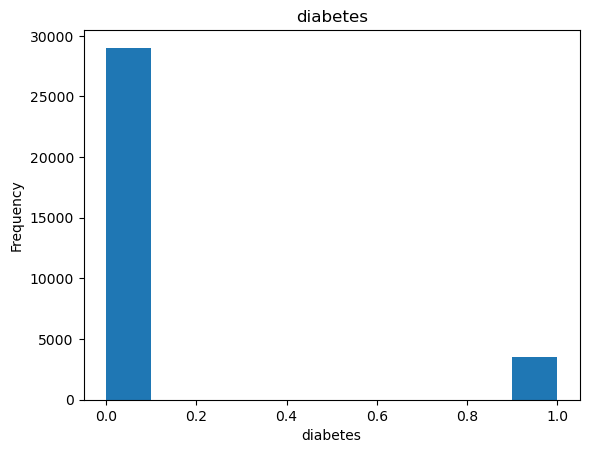

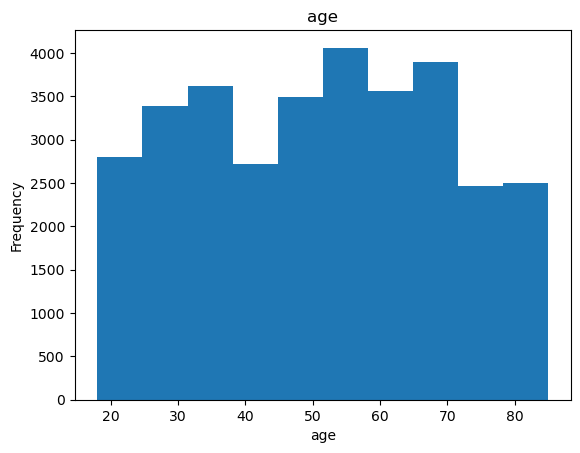

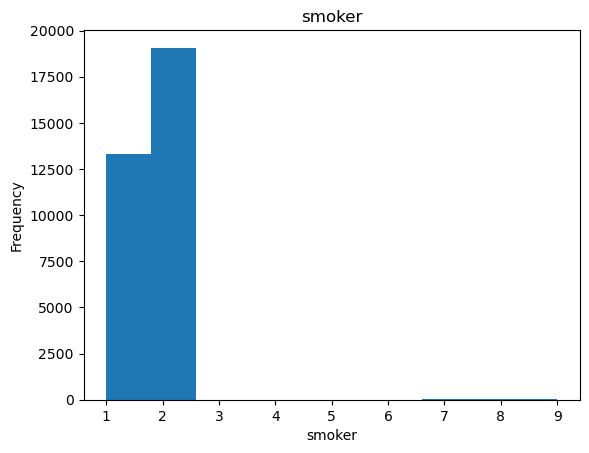

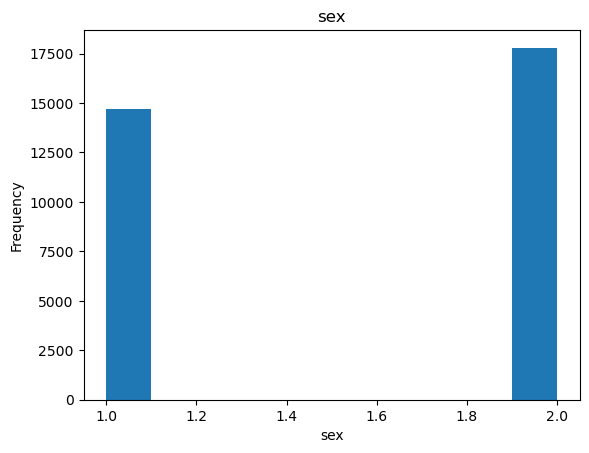

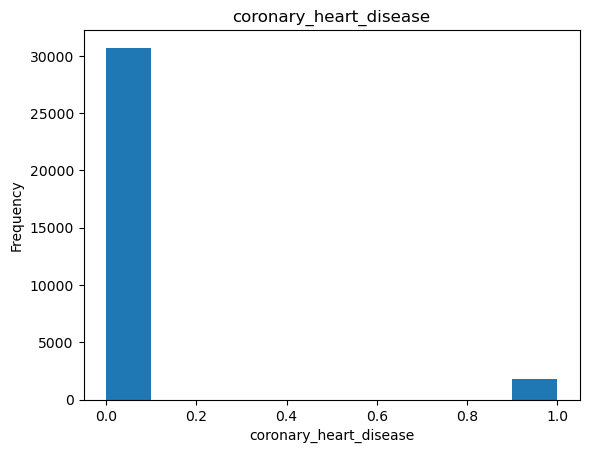

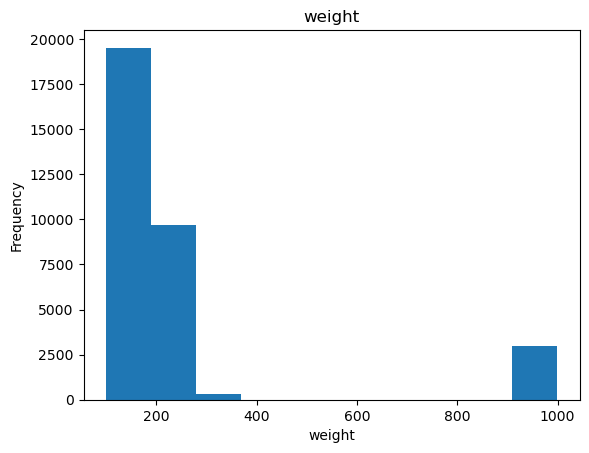

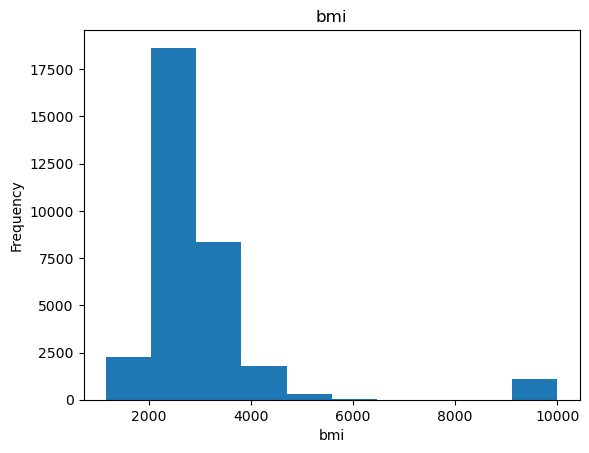

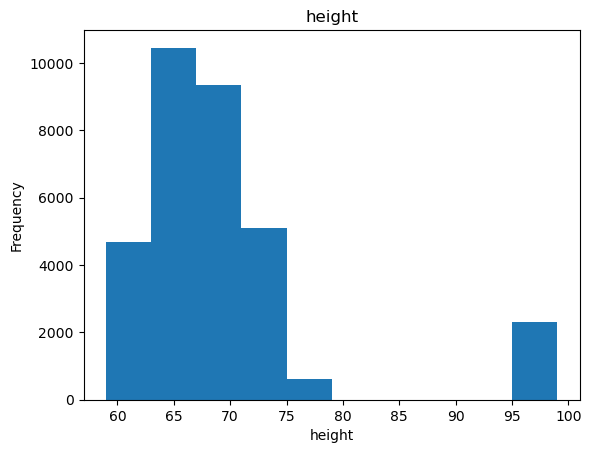

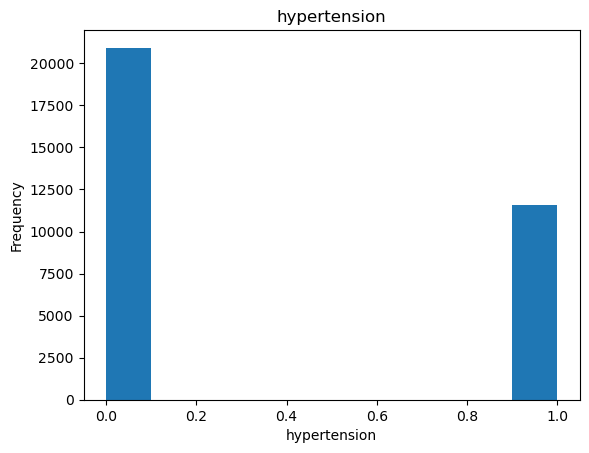

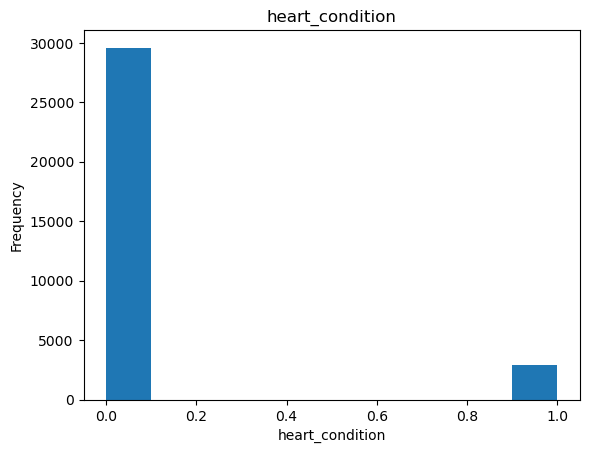

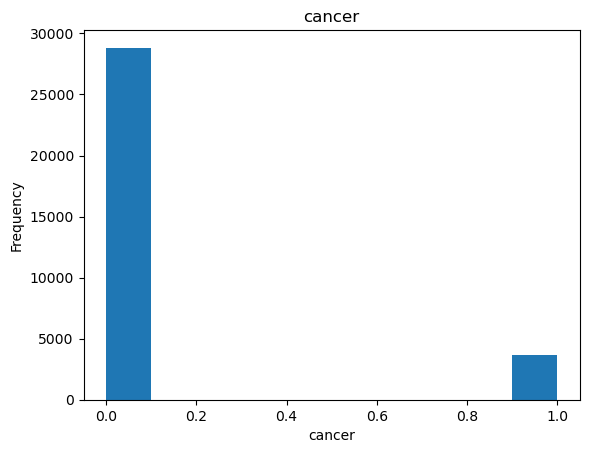

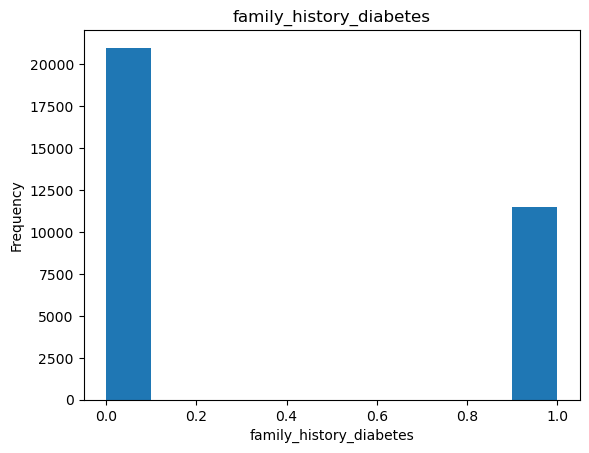

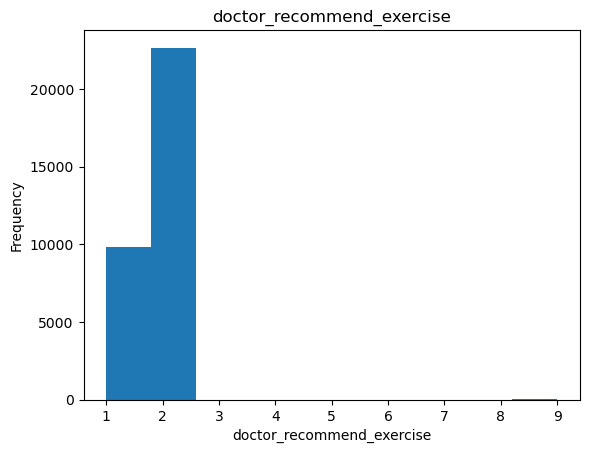

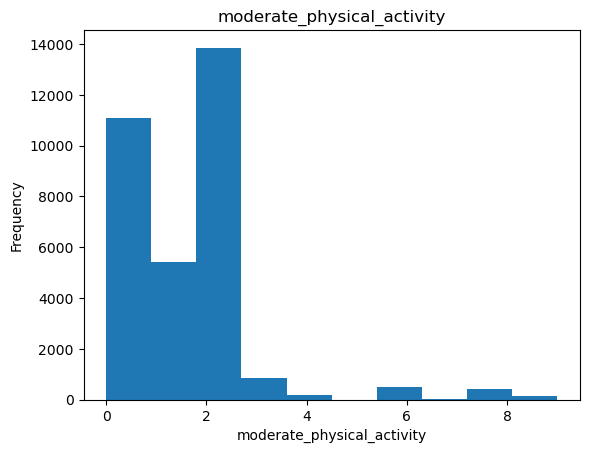

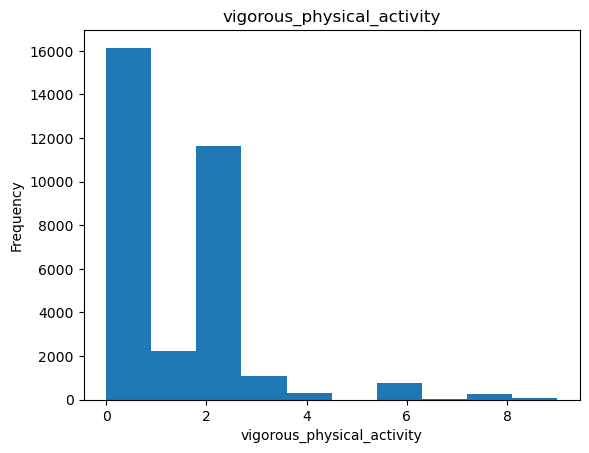

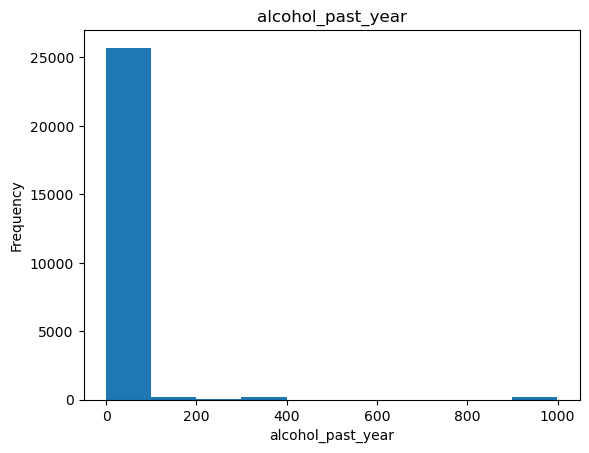

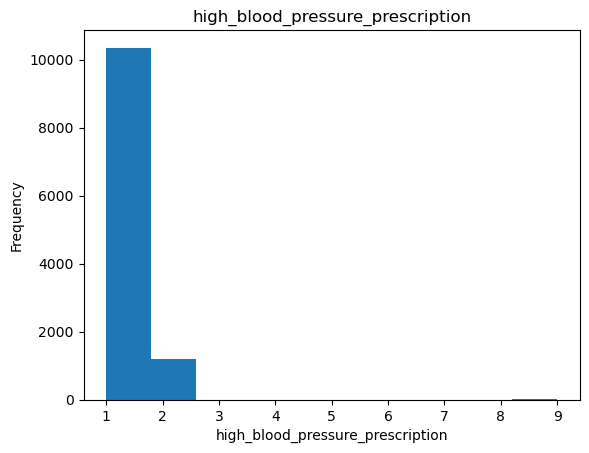

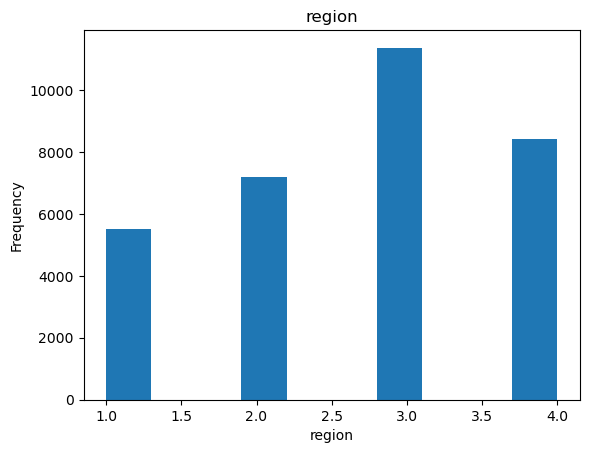

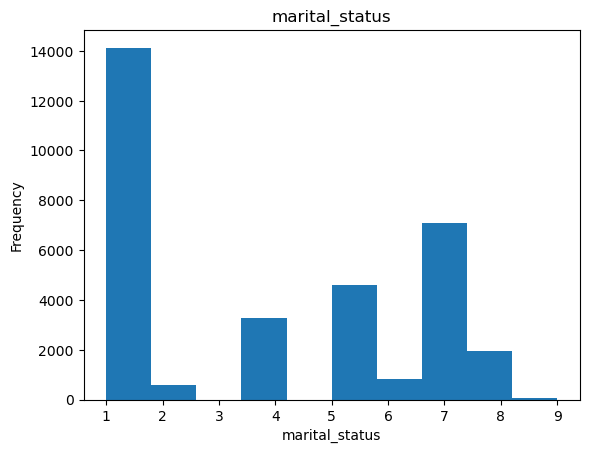

In [132]:
for i in range(1,len(diabetes_data.columns)):
    plt.hist(diabetes_data[diabetes_data.columns[i]])
    plt.title(diabetes_data.columns[i])
    plt.xlabel(diabetes_data.columns[i])
    plt.ylabel("Frequency")
    plt.show()

In [141]:
diabetes_data.describe()

,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes,doctor_recommend_exercise,moderate_physical_activity,vigorous_physical_activity,alcohol_past_year,high_blood_pressure_prescription,region,marital_status
count,3.249900e+04,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,32499.000000,26336.000000,11571.000000,32499.000000,32499.000000
mean,3.569249e+08,0.107142,51.051017,1.608942,1.547494,0.055232,251.113850,3045.910736,68.817748,0.356042,0.089603,0.112865,0.354134,1.701714,1.361057,1.149758,15.294122,1.111658,2.698329,3.755408
std,2.057800e+08,0.309298,18.511120,0.609761,0.497747,0.228437,240.280025,1451.552127,8.459210,0.478835,0.285616,0.316433,0.478257,0.487912,1.455637,1.480255,96.447840,0.387548,1.033449,2.670598
min,1.020100e+04,0.000000,18.000000,1.000000,1.000000,0.000000,100.000000,1167.000000,59.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.797701e+08,0.000000,35.000000,1.000000,1.000000,0.000000,150.000000,2374.000000,64.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000
50%,3.554401e+08,0.000000,52.000000,2.000000,2.000000,0.000000,176.000000,2724.000000,67.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1.000000,2.000000,1.000000,3.000000,4.000000
75%,5.341951e+08,0.000000,66.000000,2.000000,2.000000,0.000000,214.000000,3173.000000,70.000000,1.000000,0.000000,0.000000,1.000000,2.000000,2.000000,2.000000,4.000000,1.000000,4.000000,7.000000
max,7.157901e+08,1.000000,85.000000,9.000000,2.000000,1.000000,999.000000,9999.000000,99.000000,1.000000,1.000000,1.000000,1.000000,9.000000,9.000000,9.000000,999.000000,9.000000,4.000000,9.000000


#### Numeric variables



In [150]:
num_columns = diabetes_data.select_dtypes(include=[np.number]).columns
print("Columns with Number data-types: ",num_columns)

continuos_columns = ['age', 'bmi', 'weight', 'height', 'alcohol_past_year']
print("\nContinuos data types columns: ", continuos_columns)

Columns with Number data-types:  Index(['house_family_person_id', 'diabetes', 'age', 'smoker', 'sex',
       'coronary_heart_disease', 'weight', 'bmi', 'height', 'hypertension',
       'heart_condition', 'cancer', 'family_history_diabetes',
       'doctor_recommend_exercise', 'moderate_physical_activity',
       'vigorous_physical_activity', 'alcohol_past_year',
       'high_blood_pressure_prescription', 'region', 'marital_status'],
      dtype='object')

Continuos data types columns:  ['age', 'bmi', 'weight', 'height', 'alcohol_past_year']


#### Categorical variables




In [151]:
object_columns = diabetes_data.columns.difference(num_columns)
print("Columns with Object data-types: ", object_columns)

cat_columns = ["diabetes", "smoker", "sex", "coronary_heart_disease", "hypertension",
    "heart_condition", "cancer", "family_history_diabetes", "doctor_recommended_exercise",
    "moderate_physical_activity", "vigorous_physical_activity",
    "high_blood_pressure_prescription", "region", "marital_status"]

print("\nColumns with Categorical data: ", cat_columns)

Columns with Object data-types:  Index([], dtype='object')

Columns with Categorical data:  ['diabetes', 'smoker', 'sex', 'coronary_heart_disease', 'hypertension', 'heart_condition', 'cancer', 'family_history_diabetes', 'doctor_recommended_exercise', 'moderate_physical_activity', 'vigorous_physical_activity', 'high_blood_pressure_prescription', 'region', 'marital_status']


### Examining missing values




In [58]:
# Identify columns with missing values
missing_values = diabetes_data.isnull().sum()
columns_with_missing = missing_values[missing_values > 0].index

print("Number of Missing Values for Each Column:")
print(missing_values)
print("\n")

# Print missing values for each column
for col in columns_with_missing:
    print(f"Missing values in column '{col}':")
    print(diabetes_data[diabetes_data[col].isnull()])
    print("\n")

Number of Missing Values for Each Column:
house_family_person_id     0
diabetes                   0
age                        0
smoker                     0
sex                        0
coronary_heart_disease     0
weight                     0
bmi                        0
height                     0
hypertension               0
heart_condition            0
cancer                     0
family_history_diabetes    0
dtype: int64




### Examining the data format



Currently all data is numeric although some data is categorical so we will need to convert these.

In [144]:
diabetes_data.dtypes

house_family_person_id                int64
diabetes                              int32
age                                   int64
smoker                                int64
sex                                   int64
coronary_heart_disease                int32
weight                                int64
bmi                                   int64
height                                int64
hypertension                          int32
heart_condition                       int32
cancer                                int32
family_history_diabetes               int32
doctor_recommend_exercise             int64
moderate_physical_activity            int64
vigorous_physical_activity            int64
alcohol_past_year                   float64
high_blood_pressure_prescription    float64
region                                int64
marital_status                        int64
dtype: object

### Assessing column names



Columns names were updated as a part of importing the data to ensure they were clear to the reader.

In [142]:
diabetes_data.head()

,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,bmi,height,hypertension,heart_condition,cancer,family_history_diabetes,doctor_recommend_exercise,moderate_physical_activity,vigorous_physical_activity,alcohol_past_year,high_blood_pressure_prescription,region,marital_status
0,10201,0,24,2,2,0,125,2019,66,0,0,0,0,1,0,0,1.0,NaN,2,5
1,20101,0,76,2,1,0,190,2727,70,1,0,0,0,1,2,0,NaN,1.0,3,5
2,30102,0,36,2,2,0,225,3862,64,0,0,0,1,1,0,1,2.0,NaN,4,2
3,50101,0,35,1,2,0,240,3995,65,0,0,0,1,1,0,0,1.0,NaN,3,7
4,100105,0,20,2,2,0,103,1883,62,0,0,0,1,2,2,0,NaN,NaN,3,7


### Assessing variable type



### Evaluating data completeness





### Answering any unanswered questions







## Step 4: Prepare the data

Don't forget to split the data into training, validation and test sets before you clean and pre-process it!